In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Folder containing your .pt result files
results_dir = "./results"  # Change to your actual path

methods = ["Random", "Localize", "SJLT", "FJLT", "Gaussian"]
dims = [2048, 4096, 8192]

# Initialize dictionaries to store the results
lds_data = {method: [] for method in methods}
proj_time_data = {method: [] for method in methods}

# Load results from files
for method in methods:
    for dim in dims:
        filename = f"{method}-{dim}.pt"
        filepath = os.path.join(results_dir, filename)
        if os.path.exists(filepath):
            data = torch.load(filepath)
            lds_data[method].append(data["lds"])
            proj_time_data[method].append(data["proj_time"])
            damping = data["best_damping"]
            print(f"Setting: {method}-{dim}: with damping {damping}")
        else:
            print(f"Warning: {filepath} not found!")
            # Fill in with NaN or some placeholder
            lds_data[method].append(np.nan)
            proj_time_data[method].append(np.nan)

# Colors for methods
colors = {
    "Random": 'lightcoral',
    "Localize": 'limegreen',
    "SJLT": 'dodgerblue',
    "FJLT": 'purple',
    "Gaussian": 'orange'
}

Setting: Random-2048: with damping 0.001
Setting: Random-4096: with damping 0.001
Setting: Random-8192: with damping 0.005
Setting: Localize-2048: with damping 0.001
Setting: Localize-4096: with damping 0.001
Setting: Localize-8192: with damping 0.005
Setting: SJLT-2048: with damping 0.1
Setting: SJLT-4096: with damping 0.1
Setting: SJLT-8192: with damping 0.1
Setting: FJLT-2048: with damping 100.0
Setting: FJLT-4096: with damping 100.0
Setting: FJLT-8192: with damping 100.0
Setting: Gaussian-2048: with damping 0.1
Setting: Gaussian-4096: with damping 0.1
Setting: Gaussian-8192: with damping 0.1


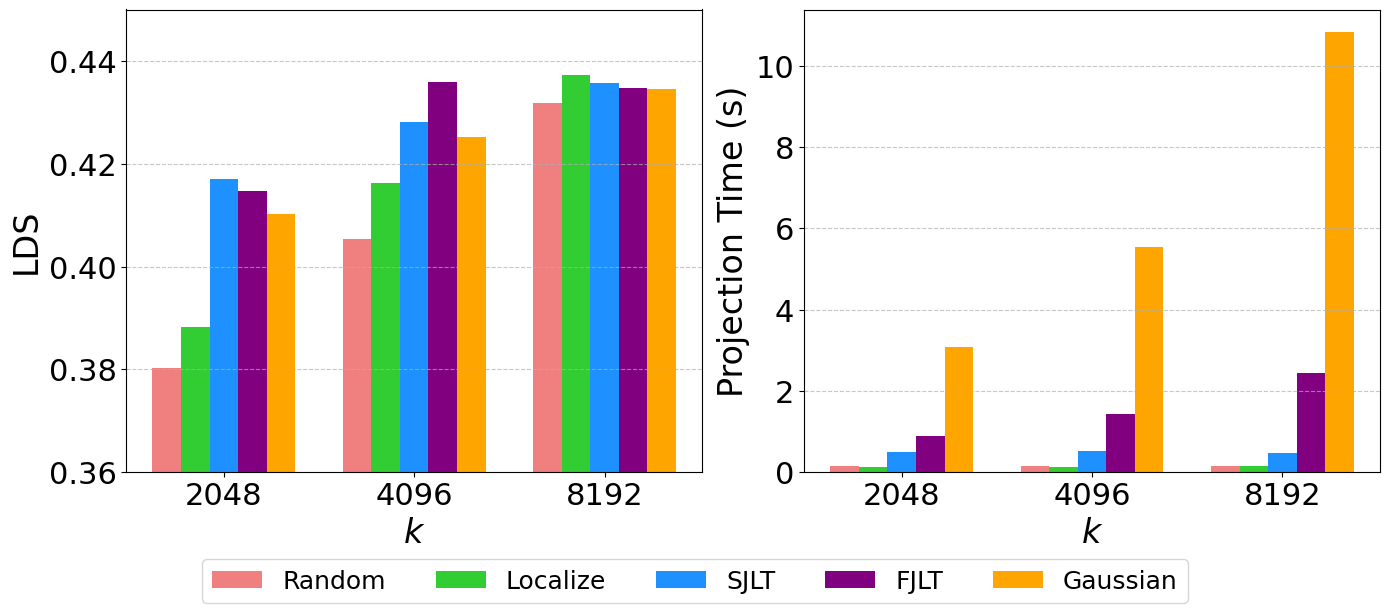

In [6]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.15  # Adjusted to fit 5 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 5 methods
pos1 = x - 2*width
pos2 = x - width
pos3 = x
pos4 = x + width
pos5 = x + 2*width

# LDS subplot
axs[0].bar(pos1, lds_data["Random"], width, label="Random", color=colors["Random"])
axs[0].bar(pos2, lds_data["Localize"], width, label="Localize", color=colors["Localize"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
axs[0].bar(pos4, lds_data["FJLT"], width, label="FJLT", color=colors["FJLT"])
axs[0].bar(pos5, lds_data["Gaussian"], width, label="Gaussian", color=colors["Gaussian"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("$k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.36, 0.45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Random"], width, color=colors["Random"])
axs[1].bar(pos2, proj_time_data["Localize"], width, color=colors["Localize"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, color=colors["SJLT"])
axs[1].bar(pos4, proj_time_data["FJLT"], width, color=colors["FJLT"])
axs[1].bar(pos5, proj_time_data["Gaussian"], width, color=colors["Gaussian"])
# axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("$k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random", "Localize", "SJLT", "FJLT", "Gaussian"], loc='upper center', ncol=5, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/MLP_MNIST.pdf', format='pdf', bbox_inches="tight")
plt.show()